#### Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


### Data Collection

In [4]:
df = pd.read_csv(r'D:\Deep Learning\Artificial_Neuron_Network (ANN)\Classification\Binary-class\Chrun-Pred\Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df['Geography'] = df['Geography'].map({'France':0, 'Spain':1, 'Germany':2})
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [18]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,2,0,42,3,75075.31,2,1,0,92888.52


In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(8000, 10)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.35649971, -0.90598864, -0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  0.29858326, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.90598864,  1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.90598864, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]], shape=(8000, 10))

In [25]:
X_test_scaled

array([[-0.57749609,  1.50315516, -0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.90598864, -0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  0.29858326,  1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.90598864,  1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.90598864, -0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  1.50315516, -0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]], shape=(2000, 10))

In [26]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=10))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
his = model.fit(X_train_scaled,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7784 - loss: 0.5440 - val_accuracy: 0.7987 - val_loss: 0.4651
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4630 - val_accuracy: 0.8044 - val_loss: 0.4404
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4381 - val_accuracy: 0.8175 - val_loss: 0.4206
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4173 - val_accuracy: 0.8356 - val_loss: 0.4029
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.3965 - val_accuracy: 0.8394 - val_loss: 0.3863
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.3777 - val_accuracy: 0.8544 - val_loss: 0.3725
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8559 - loss: 0.3624 - val_accuracy: 0.8594 - val_loss: 0.3627
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8595 - loss: 0.3538 - val_accuracy: 0.

In [30]:
model.layers[0].get_weights()

[array([[ 4.0997922e-02,  3.2858858e-01,  1.7695768e-01, -4.4550464e-02,
          5.3474970e-02,  2.5006849e-01,  3.1449965e-01,  2.7449542e-01,
          1.7966421e-01, -4.5288026e-02],
        [-1.0594054e-02,  2.1867216e-01,  5.6182478e-02, -9.0444177e-02,
          2.3456435e-01, -7.0027441e-01,  3.6958799e-01,  5.4125804e-01,
          2.3885798e-01, -1.9752768e-01],
        [-4.7129577e-01,  1.4939244e-01,  3.4668726e-01,  2.5977230e-02,
          1.4017938e-01, -1.3025023e-02,  2.6932853e-01, -4.3186978e-02,
         -2.9465549e-02, -6.1480530e-02],
        [-4.4205397e-01,  5.7218432e-01,  1.9019291e-01,  7.8848153e-01,
          6.7354268e-01, -6.3306469e-01, -7.0587486e-02,  1.7868060e-01,
         -1.9485349e-02,  4.3995851e-01],
        [-1.8024838e-01, -9.4930612e-02,  2.4541214e-01, -6.3774914e-02,
          3.2193590e-02, -1.2478360e-01,  3.7084410e-01, -4.3306890e-01,
          3.3406538e-01, -2.7300769e-02],
        [ 1.3590218e-01,  3.4083867e-01,  4.4280887e-02, -1.

In [31]:
model.layers[1].get_weights()

[array([[-0.06469592,  0.0516858 , -0.06407841,  0.29582193, -0.14664488,
         -0.00632602,  0.43677905,  0.36555004, -0.42575663,  0.48382598],
        [ 0.5511132 , -0.09135981,  0.18288419, -0.15715443,  0.35462132,
          0.09114151,  0.38896686,  0.42985198,  0.32396376, -0.3455808 ],
        [-0.4537006 ,  0.2936961 , -0.3582074 , -0.29806018, -0.5091215 ,
          0.14551012,  0.46261054,  0.5450337 , -0.34281418, -0.3090245 ],
        [ 0.72163963,  0.13719784, -0.4036552 , -0.40920416, -0.16320157,
         -0.02922843, -0.22847202,  0.22670966,  0.23114714,  0.4017387 ],
        [-0.2584875 , -0.21729137, -0.3113108 , -0.23881659,  0.35515934,
          0.4534546 , -0.20919947, -0.10210085,  0.16039464, -0.6779376 ],
        [-0.38558403,  0.19745806,  0.05919467,  0.20547856,  0.06937103,
          0.12576273, -0.2847959 , -0.36777946, -0.20455118, -0.10185284],
        [-0.0827447 ,  0.08710368,  0.38506556, -0.4128835 , -0.6413593 ,
          0.25477836,  0.0976629

In [32]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print('Accuracy:', acc)

Accuracy: 0.86


In [35]:
his.history

{'accuracy': [0.7784374952316284,
  0.7931249737739563,
  0.8017187714576721,
  0.8137500286102295,
  0.827343761920929,
  0.8460937738418579,
  0.8559374809265137,
  0.8595312237739563,
  0.8596875071525574,
  0.8620312213897705,
  0.8614062666893005,
  0.8610937595367432,
  0.8623437285423279,
  0.86328125,
  0.8610937595367432],
 'loss': [0.5440162420272827,
  0.4629667401313782,
  0.43811699748039246,
  0.41725730895996094,
  0.39648672938346863,
  0.3776918649673462,
  0.3624188303947449,
  0.3538167178630829,
  0.3500077426433563,
  0.34716853499412537,
  0.3450990319252014,
  0.3428885340690613,
  0.34188148379325867,
  0.3408688008785248,
  0.33961960673332214],
 'val_accuracy': [0.7987499833106995,
  0.8043749928474426,
  0.8174999952316284,
  0.8356249928474426,
  0.8393750190734863,
  0.8543750047683716,
  0.859375,
  0.862500011920929,
  0.8575000166893005,
  0.8612499833106995,
  0.8587499856948853,
  0.8575000166893005,
  0.8600000143051147,
  0.8575000166893005,
  0.8587

not much overfitting

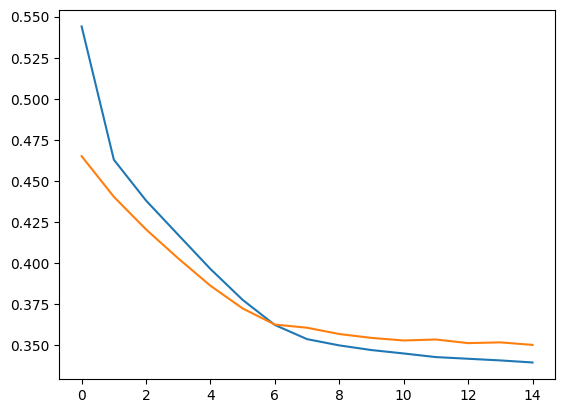

In [36]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

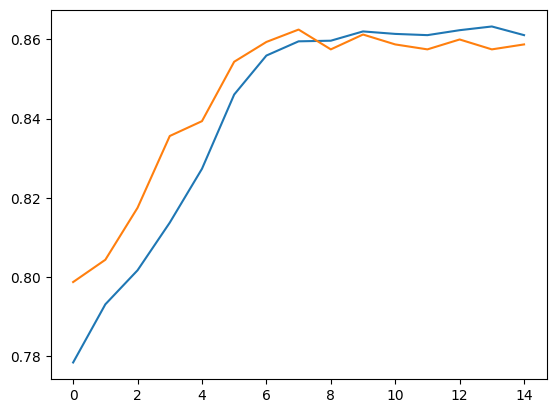

In [37]:
plt.plot(his.history['accuracy'], label='train_accuracy')
plt.plot(his.history['val_accuracy'], label='train_accuracy')